# handling variables

In [1]:
import os
print(os.path.abspath('.'))

C:\Users\Adminstrator\Desktop\term2\CPSC340\review


## upload dataset

In [1]:
import pandas as pd
import numpy as np
ff=open(r'\\10.1.57.42\共享目录\闫晋彤\借呗2.0建模\data.csv',encoding='gb18030')
dt=pd.read_csv(ff)
dt.head()

,customerid,inputdate,bd_fst_maturity_dt,bd_age,zmjoinrisk,zmriskrating,zmsolvencyratings,zmcustseg,zmmobilefixedgrade,zmadrstabilitygrade,...,zmhavecarprobgrade,zmhavefangprobgrade,zmovdordercnt6mgrade,zmovdorderamt6mgrade,zmovdorderdays6mgrade,zmpositivebizcnt1ygrade,zmrepayamt6mgrade,zmfirstloanlengthgrade,zmriskscore,y
0,MY20200207115883914246,20200207,20200904,25,1,3,4,4,4,5,...,1,1,1,1,2,10,6,3,5,1
1,MY20200207115818228742,20200207,20200615,26,1,3,2,3,6,4,...,1,1,5,1,1,2,4,2,6,0
2,MY20200207115811858790,20200207,20200702,28,1,1,2,4,10,8,...,1,1,4,1,1,10,6,3,4,0
3,MY20200207116334265590,20200207,20200415,29,1,3,2,4,3,8,...,2,1,1,1,1,10,6,4,5,1
4,MY20200207116860700658,20200207,20200528,34,1,3,1,3,7,4,...,1,2,1,1,1,10,9,3,4,0


In [2]:
dt.shape

(39320, 24)

In [3]:
dt.drop(['customerid','inputdate','bd_fst_maturity_dt'],inplace=True,axis=1)

## define Y 

In [4]:
data_1_y=dt[dt['y']>29]
data_0_y = dt[dt['y']==0]
data = pd.concat([data_1_y,data_0_y],axis=0)
data['y'] = data['y'].apply(lambda x: 1 if x>29 else 0 )
# data.to_csv('F:\y_net.csv',encoding='GBK')
data_y1 =data['y']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32455 entries, 60 to 39319
Data columns (total 21 columns):
bd_age                        32455 non-null int64
zmjoinrisk                    32455 non-null int64
zmriskrating                  32455 non-null int64
zmsolvencyratings             32455 non-null int64
zmcustseg                     32455 non-null int64
zmmobilefixedgrade            32455 non-null int64
zmadrstabilitygrade           32455 non-null int64
zmdevstabilitygrade           32455 non-null int64
zmtotpayamt6mgrade            32455 non-null int64
zmxfdcindex                   32455 non-null int64
zmlast6mavgassettotalgrade    32455 non-null int64
zmhavecarprobgrade            32455 non-null int64
zmhavefangprobgrade           32455 non-null int64
zmovdordercnt6mgrade          32455 non-null int64
zmovdorderamt6mgrade          32455 non-null int64
zmovdorderdays6mgrade         32455 non-null int64
zmpositivebizcnt1ygrade       32455 non-null int64
zmrepayamt6mgrade      

In [5]:
data.shape

(32455, 21)

In [6]:
data['y'].value_counts()

0    30920
1     1535
Name: y, dtype: int64

## Singal value

In [7]:
def dan1(list_name,danyi_threshold=0.8):
    def danyi(col,danyi_threshold):
        # 求得其中一个 变量的 value_counts
        zmfen=pd.DataFrame(data[col].value_counts()) # 作为dataframe 来显示 它的数值 以及对应个数
        zmfen.columns = ['个数']
        zmfen["数值"]=zmfen.index #增加数值一列
        zmfen["数量占比"]=zmfen['个数']/(zmfen['个数'].sum())# 增加各值 的数量占比
        #zmfen.reset_index(drop=True,inplace=True)
        if any(zmfen["数量占比"]>danyi_threshold):
             return 'drop' #应该删除
        else :
             return '保留'  #安全
    lst = []
    for i in  list_name: # 循环每个变量
        lst.append([i,danyi(i,danyi_threshold)])  # 每个变量的 返回 0 或 1 
    return pd.DataFrame(lst,columns=['变量名','数值占比是否达到阈值'])

In [8]:
list_name=data.columns.tolist()
list_name.remove('y')

In [9]:
v_dan1=dan1(list_name,0.9)
v_dan1

,变量名,数值占比是否达到阈值
0,bd_age,保留
1,zmjoinrisk,drop
2,zmriskrating,保留
3,zmsolvencyratings,保留
4,zmcustseg,保留
5,zmmobilefixedgrade,保留
6,zmadrstabilitygrade,保留
7,zmdevstabilitygrade,保留
8,zmtotpayamt6mgrade,保留
9,zmxfdcindex,保留


In [10]:
v_bl_dan1=v_dan1['变量名'][v_dan1['数值占比是否达到阈值']=='保留'].tolist()
v_bl_dan1.insert(1,'y')
v_bl_dan1.insert(0,'zmovdorderamt6mgrade')

In [11]:
data_0=data[v_bl_dan1]
data_0.shape

(32455, 19)

## Missing value

In [12]:
print(data_0.isnull().sum())

zmovdorderamt6mgrade          0
bd_age                        0
y                             0
zmriskrating                  0
zmsolvencyratings             0
zmcustseg                     0
zmmobilefixedgrade            0
zmadrstabilitygrade           0
zmdevstabilitygrade           0
zmtotpayamt6mgrade            0
zmxfdcindex                   0
zmlast6mavgassettotalgrade    0
zmhavecarprobgrade            0
zmovdordercnt6mgrade          0
zmovdorderdays6mgrade         0
zmpositivebizcnt1ygrade       0
zmrepayamt6mgrade             0
zmfirstloanlengthgrade        0
zmriskscore                   0
dtype: int64


## IV（scorecardpy）

In [13]:
import scorecardpy as sc
K =sc.iv(data_0, y='y')

In [14]:
K

,variable,info_value
11,zmriskrating,0.386240
12,zmovdorderdays6mgrade,0.105463
16,zmcustseg,0.065808
1,zmfirstloanlengthgrade,0.047267
0,zmovdordercnt6mgrade,0.038842
8,zmovdorderamt6mgrade,0.037358
9,zmrepayamt6mgrade,0.033908
17,zmtotpayamt6mgrade,0.031244
15,bd_age,0.029008
7,zmlast6mavgassettotalgrade,0.023630


In [15]:
data_0.drop(['zmdevstabilitygrade'],inplace=True, axis=1)

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Deal with Missing value

### Float

In [16]:
import numpy as np
data_num = data_0.select_dtypes(include='float')
# data_num.replace({-9999:np.nan,-9998:np.nan,-9997:np.nan},inplace=True)
data_num.fillna(-9990,inplace=True)
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32455 entries, 60 to 39319
Empty DataFrame

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


### Int

In [17]:
data_int = data_0.select_dtypes(include='int64')
data_int.head()
data_y = data_int['y']
data_int.drop(['y'],axis=1,inplace=True)
# data_int.replace({-9999:np.nan,-9998:np.nan,-9997:np.nan},inplace=True)
data_int.fillna(-9990,inplace=True)
data_int.head()

,zmovdorderamt6mgrade,bd_age,zmriskrating,zmsolvencyratings,zmcustseg,zmmobilefixedgrade,zmadrstabilitygrade,zmtotpayamt6mgrade,zmxfdcindex,zmlast6mavgassettotalgrade,zmhavecarprobgrade,zmovdordercnt6mgrade,zmovdorderdays6mgrade,zmpositivebizcnt1ygrade,zmrepayamt6mgrade,zmfirstloanlengthgrade,zmriskscore
60,1,33,3,2,3,8,4,2,4,1,2,1,1,2,2,2,6
77,1,35,3,2,3,10,9,8,4,2,2,3,1,10,6,3,4
84,1,43,3,1,3,10,2,7,10,3,2,1,1,7,6,3,5
98,1,33,3,1,4,10,9,3,2,1,2,1,1,7,9,4,5
128,3,32,3,1,3,3,4,10,3,8,1,3,3,10,10,3,3


### Data integration

In [18]:
data_clean = pd.concat([data_num,data_int,data_y],axis=1)
# data_clean.to_csv('F:\data_clean.csv',encoding='GBK')
data_clean.isnull().sum()

zmovdorderamt6mgrade          0
bd_age                        0
zmriskrating                  0
zmsolvencyratings             0
zmcustseg                     0
zmmobilefixedgrade            0
zmadrstabilitygrade           0
zmtotpayamt6mgrade            0
zmxfdcindex                   0
zmlast6mavgassettotalgrade    0
zmhavecarprobgrade            0
zmovdordercnt6mgrade          0
zmovdorderdays6mgrade         0
zmpositivebizcnt1ygrade       0
zmrepayamt6mgrade             0
zmfirstloanlengthgrade        0
zmriskscore                   0
y                             0
dtype: int64

In [26]:
data_clean.shape

(32455, 18)

# features selection

## Importance by RandomForest

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

X = data_clean.iloc[:,:-1]
Y = data_clean['y']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=40)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y = rf.predict(X_test)
cla = rf.score(X_train, y_train)
cla_1 = rf.score(X_test, y_test)
importance = rf.feature_importances_.round(2).tolist()
label = X.columns.tolist()
imp_dict = {'name':label,'imp':importance}
imp =pd.DataFrame(imp_dict)
print(imp[imp['imp']>=0.01])
col_imp = imp[imp['imp']>=0.01].name.tolist()

NameError: name 'data_clean' is not defined

In [ ]:
col_imp

## IV(toad)

In [950]:
import toad
quality = toad.quality(data_clean,'y',iv_only=True).sort_values(by='iv',ascending=False)
quality

,iv,gini,entropy,unique
zmriskrating,0.386240,NaN,NaN,4.0
zmovdorderdays6mgrade,0.105463,NaN,NaN,3.0
zmcustseg,0.065422,NaN,NaN,4.0
zmfirstloanlengthgrade,0.047267,NaN,NaN,4.0
zmovdordercnt6mgrade,0.038842,NaN,NaN,5.0
zmovdorderamt6mgrade,0.037358,NaN,NaN,3.0
zmrepayamt6mgrade,0.033908,NaN,NaN,10.0
zmtotpayamt6mgrade,0.031244,NaN,NaN,10.0
zmlast6mavgassettotalgrade,0.023548,NaN,NaN,10.0
zmriskscore,0.023148,NaN,NaN,8.0


In [391]:
import toad
data_clean_0, drop_lst= toad.selection.select(data_clean,target = 'y',##目标列 
                        empty = 0.2, #缺失率高于设定值的，都删除。值越低越好
                        iv = 0.01,corr = 0.6, return_drop=True, exclude=None)

In [392]:
data_clean_0.shape

(32455, 16)

In [953]:
data_clean_0.columns

Index(['zmovdorderamt6mgrade', 'bd_age', 'zmriskrating', 'zmsolvencyratings',
       'zmcustseg', 'zmtotpayamt6mgrade', 'zmxfdcindex',
       'zmlast6mavgassettotalgrade', 'zmhavecarprobgrade',
       'zmovdordercnt6mgrade', 'zmovdorderdays6mgrade',
       'zmpositivebizcnt1ygrade', 'zmrepayamt6mgrade',
       'zmfirstloanlengthgrade', 'zmriskscore', 'y'],
      dtype='object')

In [115]:
var_list=['bd_age', #
          'zmriskrating',# 
          'zmcustseg',#
          #'zmmobilefixedgrade',
          #'zmadrstabilitygrade',
          #'zmdevstabilitygrade',
          'zmtotpayamt6mgrade', #
          #'zmxfdcindex', 
          'zmlast6mavgassettotalgrade', #
          'zmhavecarprobgrade',#
          'zmovdordercnt6mgrade', #
          'zmovdorderdays6mgrade',
          #'zmpositivebizcntaygrade', 
          'zmrepayamt6mgrade',#
          #'zmfirstloanlengthgrade',#
          'zmriskscore', #
          'y']
data_clean1=data_clean[var_list]

In [22]:
data_clean1.shape

NameError: name 'data_clean1' is not defined

# XGBoost

## Samples in model 

In [19]:
varlist=['zmriskrating'
,'zmovdorderdays6mgrade'
#,'zmcustseg'
,'zmfirstloanlengthgrade'
,'zmovdordercnt6mgrade'
#,'zmovdorderamt6mgrade'
,'zmriskscore'
#,'zmrepayamt6mgrade'
,'zmlast6mavgassettotalgrade'
,'zmtotpayamt6mgrade'
#,'zmhavecarprobgrade'
#,'zmxfdcindex'
,'zmpositivebizcnt1ygrade'
,'zmadrstabilitygrade'
#,'bd_age'
#,'zmmobilefixedgrade'
#,'zmsolvencyratings'
         ,'y']
data_cleanx=data_clean[varlist]
# data_cleanx.columns=['zmRiskRating',
#                      'zmOvdOrderDays6mGrade',
#                      'zmFirstLoanLengthGrade',
#                      'zmOvdOrderCnt6mGrade',
#                      'zmRiskScore',
#                      'zmLast6mAvgAssetTotalGrade',
#                      'zmTotPayAmt6mGrade',
#                      'zmPositiveBizCnt1yGrade',
#                      'zmAdrStabilityGrade',
#                      'y']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score  
from sklearn.ensemble import RandomForestClassifier
np.random.seed(2)
X_train, X_test, Y_train, Y_test= train_test_split(data_cleanx.iloc[:,:-1],data_cleanx['y'],test_size=0.3,random_state=2)##random_state：设置随机数种子，保证每次都是同一个随机数。若为0或不填，则每次得到数据都不一样
data_train= pd.concat([X_train,Y_train,], axis=1)#训练数据构建模型
data_train.index = range(data_train.shape[0])
data_train.columns = data_cleanx.columns
 
data_test = pd.concat([X_test,Y_test], axis=1)#验证集
data_test.index = range(data_test.shape[0])
data_test.columns = data_cleanx.columns
data_test.columns

Index(['zmriskrating', 'zmovdorderdays6mgrade', 'zmfirstloanlengthgrade',
       'zmovdordercnt6mgrade', 'zmriskscore', 'zmlast6mavgassettotalgrade',
       'zmtotpayamt6mgrade', 'zmpositivebizcnt1ygrade', 'zmadrstabilitygrade',
       'y'],
      dtype='object')

In [63]:
## Bayes choosing models
from hyperopt import fmin, tpe, hp
from fx.build_model import bayes 
space4rf ={
     'colsample_bylevel':hp.choice('colsample_bylevel',[0.2,0.3,0.4,0.5,0.6,0.7,0.8]),
    'max_depth': hp.choice('max_depth',[2,3,4]),
    #'scale_pos_weight': hp.choice('scale_pos_weight',range(5,90)),
    'n_estimators': hp.choice('n_estimators',range(10,40)),
    'colsample_bytree': hp.choice( 'colsample_bytree',[0.2,0.3,0.4,0.5,0.6,0.7,0.8]),
    #'min_samples_split':hp.choice( 'min_samples_split',[2,3,4]),
    'subsample': hp.choice('subsample',[0.2,0.3,0.4,0.5,0.6,0.7,0.8]),
    'seed':20
}##传入参数
bayes(space4rf,##传入参数
      X_train,X_test,Y_train,Y_test,##训练集和测试集
      method='xgboost',##选用算法,支持：‘xgboost’,‘lightgbm’,‘catboost’,‘randomforst’
      rate=0.1,##以防过拟合，rate=abs(train_ks-test_ks)/train_ks
      evals=100##循环展示
     )

  0%|                                    | 0/100 [00:00<?, ?it/s, best loss: ?]

D:\Program Files\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:43:46] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
pass                                                                           
[13:43:52] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
new best:                                                                      
{'test_ks': 0.301, 'train_ks': 0.3257}                                         
{'colsample_bylevel': 0.8, 'colsample_bytree': 0.4, 'max_depth': 3, 'n_estimators': 38, 'seed': 20, 'subsample': 0.6}
[13:43:56] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061

In [21]:
import xgboost as xgb
xgbc=xgb.XGBClassifier(
    colsample_bylevel=0.8,
    max_depth=4,###2\3\4
    #scale_pos_weight=27,#24
    n_estimators=13,###24
    colsample_bytree=0.7,
    ##earning_rate=0.1,
    subsample=0.5,
    objective='binary:logistic'
    ,seed=20)
#####转pmml文件
# from sklearn2pmml import PMMLPipeline
# pipeline = PMMLPipeline([("classifier",xgbc)])
# pipeline.fit(X_train,Y_train)
clf=xgbc.fit(X_train,Y_train)

D:\Program Files\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:01:18] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
y_train_preprob=xgbc.predict_proba(X_train)[:,1]  # type(rf.predict_proba(train_X)) 为ndarray
y_test_preprob=xgbc.predict_proba(X_test)[:,1]
print('AUC (train): %f'% metrics.roc_auc_score(Y_train,y_train_preprob))
print('AUC (test): %f'% metrics.roc_auc_score(Y_test,y_test_preprob))

train_fpr, train_tpr, train_threshold = roc_curve(Y_train, y_train_preprob)
test_fpr, test_tpr, test_threshold = roc_curve(Y_test, y_test_preprob)

print('KS(train):',max(train_tpr-train_fpr).round(3))
print('KS(test):',max(test_tpr-test_fpr).round(3))

AUC (train): 0.720921
AUC (test): 0.700672
KS(train): 0.318
KS(test): 0.317


## Visualization model

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
from  xgboost import plot_tree

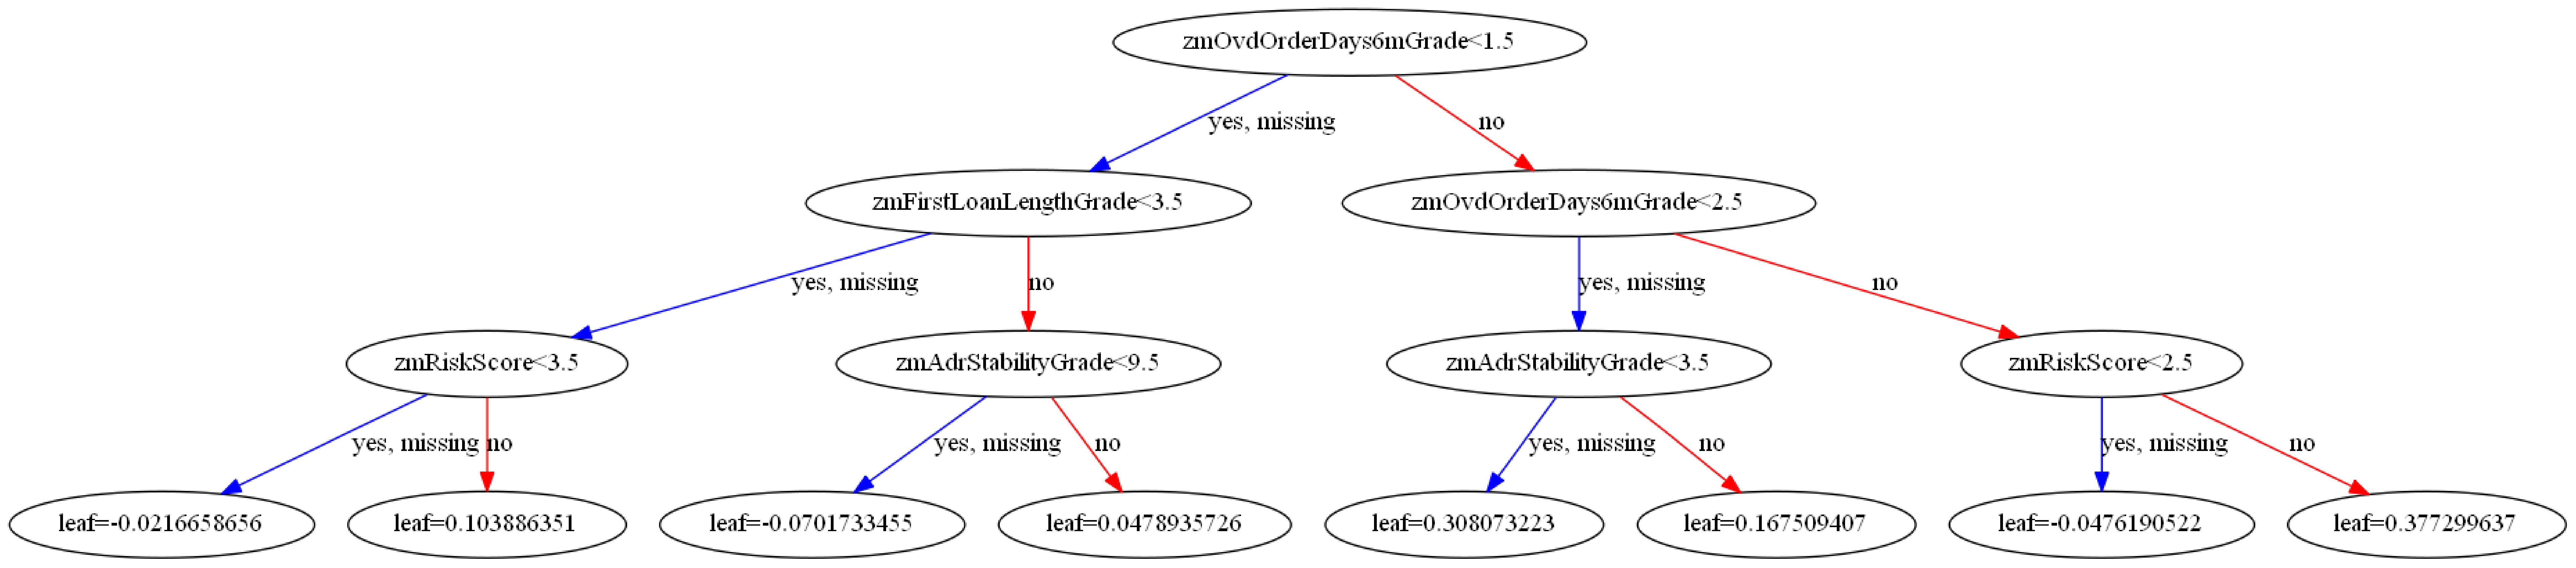

In [67]:
##第一种
plot_tree(xgbc, num_trees=0)
fig = plt.gcf()
fig.set_size_inches(150, 100)
##第二种
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 80,50
# fig=plot_tree(xgbc, num_trees=0, rankdir='LR')

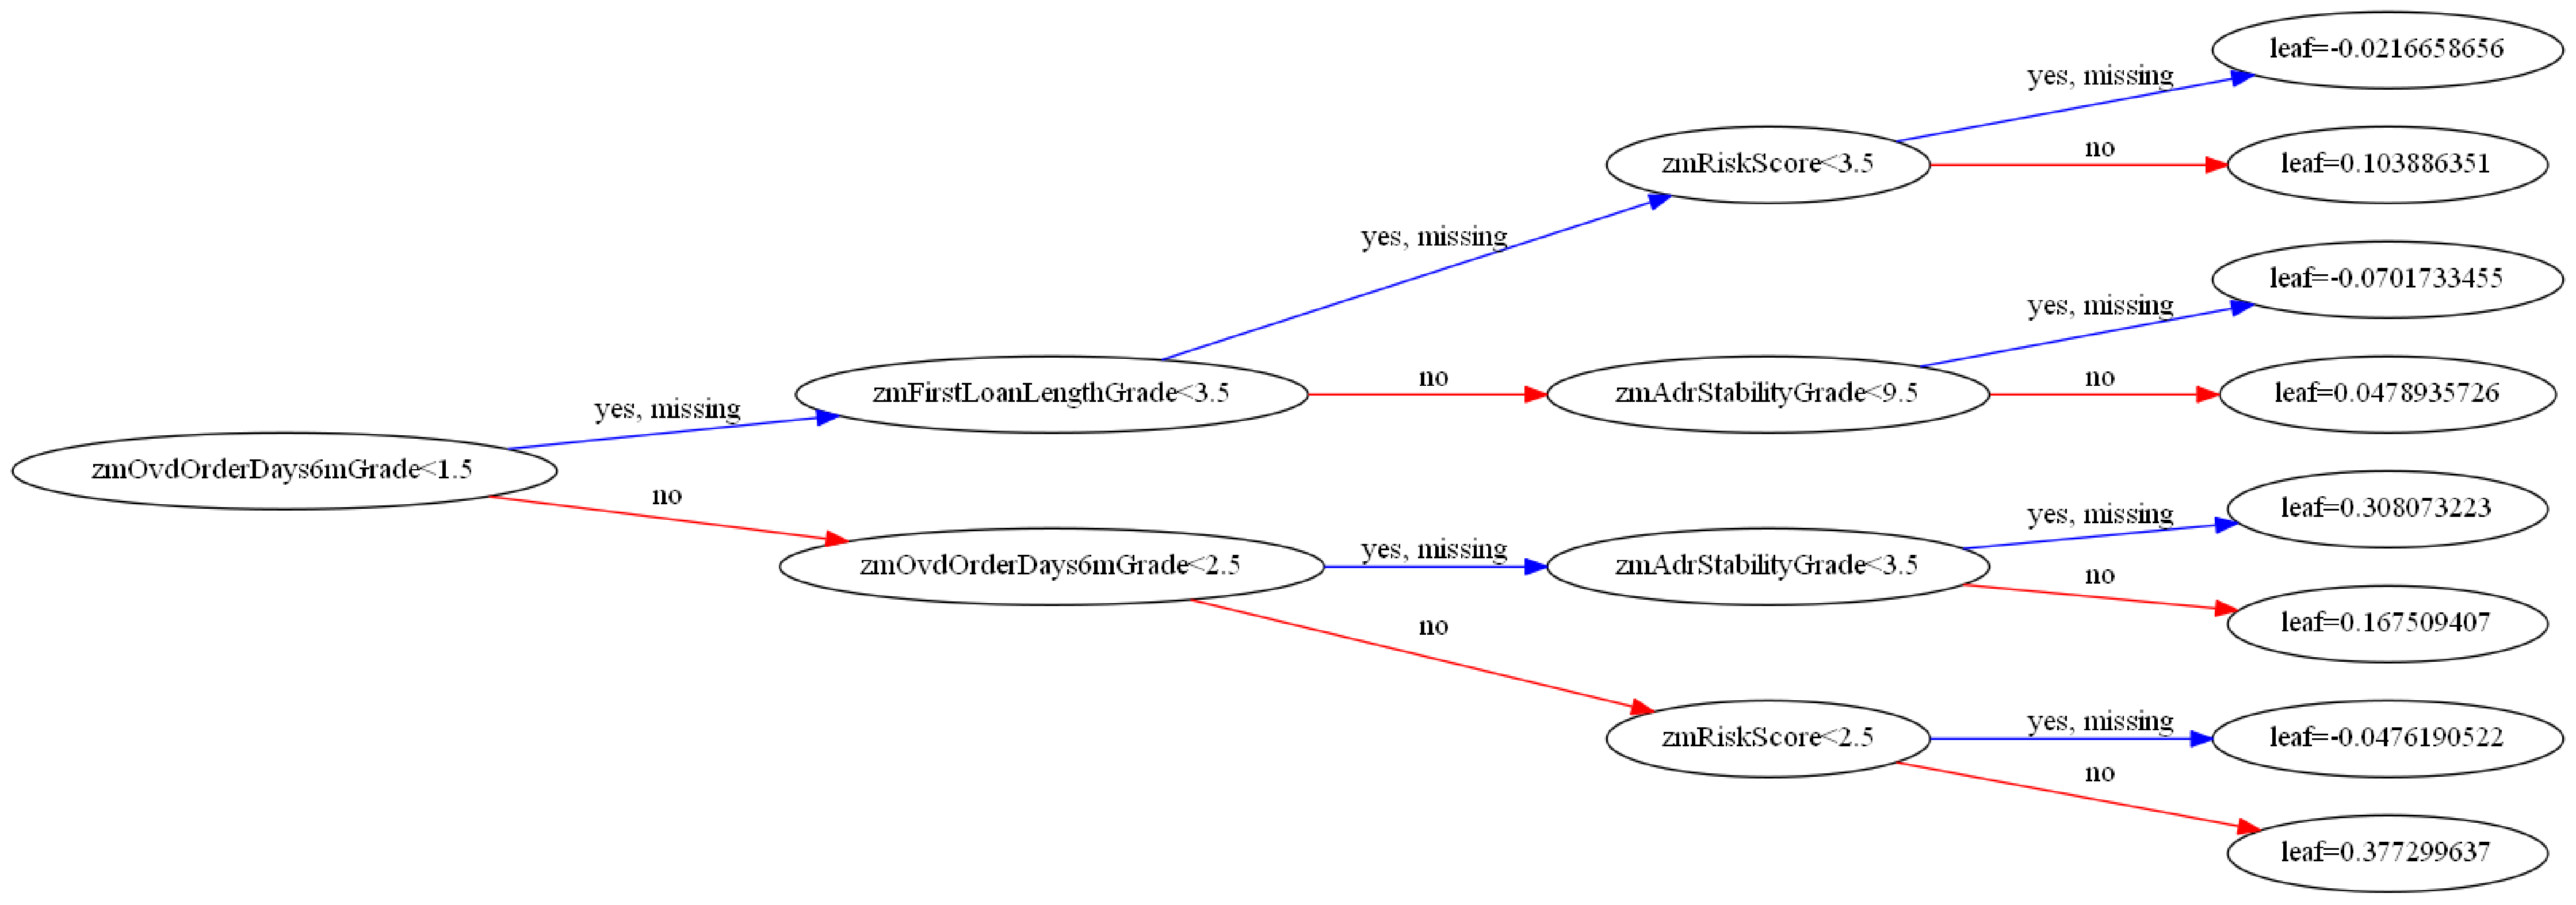

In [60]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
fig=plot_tree(xgbc, num_trees=0, rankdir='LR')

In [ ]:
#clf1=xgbc.fit(X_train,Y_train)

In [31]:
imp1=xgbc.feature_importances_.round(3).tolist()
var1=X_train.columns.tolist()
dic1={'var':var1,'imp':imp1}
imp_df1=pd.DataFrame(dic1)
# imp_df1=pd.merge(df_changyong_list,imp_df1,how='inner',left_on='varname',right_on='var')[['imp','var']]


imp_sort_df1=imp_df1.sort_values(by='imp',ascending=False)
imp_sort_df1

,var,imp
0,zmriskrating,0.356
1,zmovdorderdays6mgrade,0.165
6,zmtotpayamt6mgrade,0.083
4,zmriskscore,0.080
2,zmfirstloanlengthgrade,0.073
7,zmpositivebizcnt1ygrade,0.066
3,zmovdordercnt6mgrade,0.064
5,zmlast6mavgassettotalgrade,0.064
8,zmadrstabilitygrade,0.049


## Change to score

In [40]:
from public.Score import make_scorecard
train_sc = make_scorecard(xgbc.predict_proba(X_train),basescore=300,pdo=50) #输出分数，最小分，最大分

In [41]:
test_sc = make_scorecard(xgbc.predict_proba(X_test),basescore=300,pdo=50) #输出分数，最小分，最大分

In [42]:
all_sc=make_scorecard(xgbc.predict_proba(data_cleanx.iloc[:,:-1]),basescore=300,pdo=50)

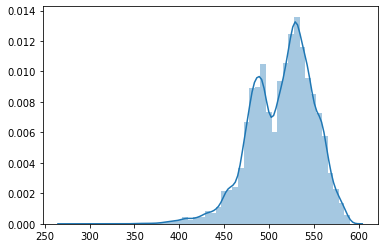

In [43]:
import seaborn as sns
sns.distplot(all_sc[0])

In [44]:
from public.Score import make_psi,make_lift
psi = make_psi(train_sc[0],test_sc[0])
psi

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Cnt_SampleA,Cnt_SampleB,Cnt_All_SampleA,Cnt_All_SampleB,SampleA_Rate,SampleB_Rate,PSI,PSI_Sum
"(277, 309]",0,1,22718,9737,0.000000,0.000103,inf,inf
"(309, 340]",1,1,22718,9737,0.000044,0.000103,0.000050,inf
"(340, 371]",15,4,22718,9737,0.000660,0.000411,0.000118,inf
"(371, 403]",91,43,22718,9737,0.004006,0.004416,0.000040,inf
"(403, 434]",338,151,22718,9737,0.014878,0.015508,0.000026,inf
"(434, 465]",1230,498,22718,9737,0.054142,0.051145,0.000171,inf
"(465, 496]",5343,2350,22718,9737,0.235188,0.241347,0.000159,inf
"(496, 527]",6205,2643,22718,9737,0.273131,0.271439,0.000011,inf
"(527, 559]",7626,3195,22718,9737,0.335681,0.328130,0.000172,inf
"(559, 591]",1869,851,22718,9737,0.082270,0.087399,0.000310,inf


In [45]:
#输入：woe后的全体y，打分全体y（非灰色）
lift = make_lift(Y_test,test_sc[0]) # 全体y的woe,全体数据分数
lift

,分位数,最低分,最高分,全体数,Y=1观测数,Y=1占比,Y=1累计占比,提升率,累计提升率
0,10,278,472,974,127,0.130390,0.130390,2.701295,2.701295
1,20,472,484,974,67,0.068789,0.099589,1.425093,2.063194
2,30,484,494,973,82,0.084275,0.094488,1.745936,1.957514
3,40,494,509,974,47,0.048255,0.082927,0.999692,1.717997
4,50,509,519,974,35,0.035934,0.073526,0.744451,1.523248
5,60,519,527,973,41,0.042138,0.068299,0.872968,1.414942
6,70,527,535,974,25,0.025667,0.062207,0.531751,1.288735
7,80,535,544,973,20,0.020555,0.057003,0.425838,1.180942
8,90,544,557,974,13,0.013347,0.052151,0.276511,1.080415
9,100,557,588,974,13,0.013347,0.048269,0.276511,1.000000


500
72.13475204444818
482.864624    18
567.692932    16
466.194794    16
468.942047    15
458.460815    13
              ..
602.259766     1
622.839417     1
698.270508     1
509.135895     1
512.002197     1
Name: Score, Length: 7725, dtype: int64


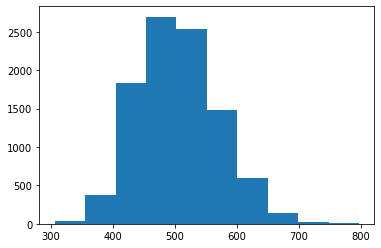

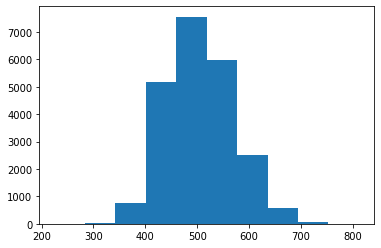

In [35]:
#####################评分映射##########################################         
import math
#### 评分参数 ###
THET=1/1
P_ZERO=500
PDO=50
B=PDO/math.log(2)
A=P_ZERO

####评分映射-训练集 ####
y_train_preprob1 = pd.DataFrame(y_train_preprob,columns=['y_train_preprob'])
y_train_preprob1
y_train_preprob1[y_train_preprob1['y_train_preprob']==1]=0.999
y_train_preprob1[y_train_preprob1['y_train_preprob']==0]=0.001

train_y1=pd.DataFrame(Y_train.values,columns=['Y_train'])
y_train_score=pd.concat([train_y1,y_train_preprob1],axis=1)

y_train_score['Score']=A-B*np.log(y_train_score['y_train_preprob']/(1-y_train_score['y_train_preprob']))
y_train_score

####评分映射-验证集 ####
y_test_preprob1 = pd.DataFrame(y_test_preprob,columns=['y_test_preprob'])
y_test_preprob1
y_test_preprob1[y_test_preprob1['y_test_preprob']==1]=0.999 
y_test_preprob1[y_test_preprob1['y_test_preprob']==0]=0.001

test_y1=pd.DataFrame(Y_test.values,columns=['Y_test'])
y_test_score=pd.concat([test_y1,y_test_preprob1],axis=1)

y_test_score['Score']=A-B*np.log(y_test_score['y_test_preprob']/(1-y_test_score['y_test_preprob']))
# y_test_score

print (A)
print (B)

print(y_test_score['Score'].value_counts())


import matplotlib.pyplot as plt
plt.hist(y_test_score['Score'])
plt.show()

plt.hist(y_train_score['Score'])
plt.show()

In [36]:
PDO=50
B=PDO/math.log(2)
B

72.13475204444818

In [37]:
#################################################评分排序性2 #########################################
y_train_score.sort_values(by='Score')
y_train_score['rank']=y_train_score['Score'].rank(method='first')
y_train_score.sort_values(by='Score')
y_train_score['bin'] = pd.qcut(y_train_score['rank'],10,precision=1 ,duplicates='drop')
y_train_score_pivot = y_train_score[['bin','Y_train']].groupby('bin').agg(['count','sum'])
y_train_score_pivot.columns = ['tot_cnt','bad_cnt']
y_train_score_pivot[['min','max']] =y_train_score[['bin','Score']].groupby('bin').agg(['min','max']).round(0)

y_train_score_pivot['good_cnt']=y_train_score_pivot['tot_cnt']-y_train_score_pivot['bad_cnt']
y_train_score_pivot['bad_rate']=(y_train_score_pivot['bad_cnt']/y_train_score_pivot['tot_cnt']).round(4)
y_train_score_pivot['good_rate']=(y_train_score_pivot['good_cnt']/y_train_score_pivot['tot_cnt']).round(4)
y_train_score_pivot['lift']=(y_train_score_pivot['bad_cnt']/y_train_score_pivot['bad_cnt'].sum())/(y_train_score_pivot['tot_cnt']/y_train_score_pivot['tot_cnt'].sum())  
y_train_score_pivot=y_train_score_pivot[['min','max','tot_cnt','good_cnt','bad_cnt','good_rate','bad_rate','lift']]   
################################################################################################
y_test_score.sort_values(by='Score')
y_test_score['rank']=y_test_score['Score'].rank(method='first')
y_test_score.sort_values(by='Score')

y_test_score['bin'] = pd.qcut(y_test_score['rank'],10,precision=0 ,duplicates='drop')
y_test_score_pivot = y_test_score[['bin','Y_test']].groupby('bin').agg(['count','sum'])
y_test_score_pivot.columns = ['tot_cnt','bad_cnt']
y_test_score_pivot[['min','max']] =y_test_score[['bin','Score']].groupby('bin').agg(['min','max']).round(0)
y_test_score_pivot['good_cnt']=y_test_score_pivot['tot_cnt']-y_test_score_pivot['bad_cnt']
y_test_score_pivot['bad_rate']=(y_test_score_pivot['bad_cnt']/y_test_score_pivot['tot_cnt']).round(4)
y_test_score_pivot['good_rate']=(y_test_score_pivot['good_cnt']/y_test_score_pivot['tot_cnt']).round(4)

y_test_score_pivot['lift']=(y_test_score_pivot['bad_cnt']/y_test_score_pivot['bad_cnt'].sum())/(y_test_score_pivot['tot_cnt']/y_test_score_pivot['tot_cnt'].sum())  
y_test_score_pivot=y_test_score_pivot[['min','max','tot_cnt','good_cnt','bad_cnt','good_rate','bad_rate','lift']]   

# y_test_score_pivot.to_csv('test_score_bin.csv')
y_test_score_pivot

,min,max,tot_cnt,good_cnt,bad_cnt,good_rate,bad_rate,lift
bin,,,,,,,,
"(0.0, 975.0]",306.0,426.0,974,857,117,0.8799,0.1201,2.488595
"(975.0, 1948.0]",426.0,448.0,974,890,84,0.9138,0.0862,1.786684
"(1948.0, 2922.0]",448.0,465.0,973,898,75,0.9229,0.0771,1.596893
"(2922.0, 3895.0]",465.0,482.0,974,927,47,0.9517,0.0483,0.999692
"(3895.0, 4869.0]",482.0,501.0,974,936,38,0.9610,0.0390,0.808262
"(4869.0, 5843.0]",501.0,519.0,973,944,29,0.9702,0.0298,0.617465
"(5843.0, 6816.0]",519.0,538.0,974,955,19,0.9805,0.0195,0.404131
"(6816.0, 7790.0]",538.0,559.0,973,949,24,0.9753,0.0247,0.511006
"(7790.0, 8763.0]",559.0,592.0,974,950,24,0.9754,0.0246,0.510481


In [36]:
import math
samplea=y_train_score['Score'].values.tolist()
sampleb=y_test_score['Score'].values.tolist()

Max=max(max(samplea),max(sampleb))
Min=min(min(samplea),min(sampleb))
result=pd.DataFrame()

bins=[363,390,417,444,471,498,525,552,579,606,633]

cnt_samplea=pd.cut(samplea,bins).value_counts(dropna=False)
cnt_sampleb=pd.cut(sampleb,bins).value_counts(dropna=False)
print(cnt_samplea)
type(cnt_sampleb)

cnt_all_samplea=len(samplea)
print(cnt_all_samplea)
cnt_all_sampleb=len(sampleb)
result['cnt_train']=cnt_samplea.values
result['cnt_test']=cnt_sampleb.values

result['cnt_all_train']=cnt_all_samplea
result['cnt_all_test']=cnt_all_sampleb
result['cnt_train_rate']=(result['cnt_train']/result['cnt_all_train'])
result['cnt_test_rate']=(result['cnt_test']/result['cnt_all_test'])
result['PSI']=(result['cnt_train_rate']-result['cnt_test_rate'])*np.log(result['cnt_train_rate']/result['cnt_test_rate'])
result['PSI_SUM']=sum(result['PSI'])
# result.to_csv('psi_result.csv',encoding='utf_8_sig' ,sep =',')
result

# np.log(result['PSI'])
# print(np.log(0.006957-0.008339))
# result

(363.0, 390.0]     361
(390.0, 417.0]    1080
(417.0, 444.0]    2516
(444.0, 471.0]    3397
(471.0, 498.0]    3431
(498.0, 525.0]    3455
(525.0, 552.0]    3122
(552.0, 579.0]    2155
(579.0, 606.0]    1524
(606.0, 633.0]     838
NaN                839
dtype: int64
22718


,cnt_train,cnt_test,cnt_all_train,cnt_all_test,cnt_train_rate,cnt_test_rate,PSI,PSI_SUM
0,361,165,22718,9737,0.015890,0.016946,6.784015e-05,0.001727
1,1080,475,22718,9737,0.047539,0.048783,3.211338e-05,0.001727
2,2516,1050,22718,9737,0.110749,0.107836,7.765055e-05,0.001727
3,3397,1559,22718,9737,0.149529,0.160111,7.235529e-04,0.001727
4,3431,1384,22718,9737,0.151026,0.142138,5.390145e-04,0.001727
5,3455,1434,22718,9737,0.152082,0.147273,1.545066e-04,0.001727
6,3122,1370,22718,9737,0.137424,0.140700,7.719550e-05,0.001727
7,2155,938,22718,9737,0.094859,0.096334,2.275496e-05,0.001727
8,1524,640,22718,9737,0.067083,0.065729,2.763744e-05,0.001727
9,838,363,22718,9737,0.036887,0.037280,4.173955e-06,0.001727


In [31]:
data_test.head()

,zmRiskRating,zmOvdOrderDays6mGrade,zmFirstLoanLengthGrade,zmOvdOrderCnt6mGrade,zmRiskScore,zmLast6mAvgAssetTotalGrade,zmTotPayAmt6mGrade,zmPositiveBizCnt1yGrade,zmAdrStabilityGrade,y
0,2,1,4,1,3,1,4,10,9,0
1,1,2,4,4,3,3,5,10,10,0
2,3,1,2,1,6,1,6,4,2,0
3,2,1,4,1,2,2,7,8,10,0
4,3,1,2,1,5,1,7,10,1,0


In [32]:
data_test.to_csv('test1.csv')

# 首次还款日在2020年5.1

In [125]:
import pandas as pd
import numpy as np
dt1=pd.read_csv(r'C:\Users\jintong.yan\Desktop\最终大.csv')
dt1.head()

FileNotFoundError: [Errno 2] File b'C:\\Users\\jintong.yan\\Desktop\\\xe6\x9c\x80\xe7\xbb\x88\xe5\xa4\xa7.csv' does not exist: b'C:\\Users\\jintong.yan\\Desktop\\\xe6\x9c\x80\xe7\xbb\x88\xe5\xa4\xa7.csv'

In [29]:
dt1.shape

(10737, 24)

In [30]:
dt1.drop(['customerid','inputdate','bd_fst_maturity_dt'],inplace=True,axis=1)

In [31]:

data_1_y=dt1[dt1['y']>29]
data_0_y = dt1[dt1['y']==0]
data = pd.concat([data_1_y,data_0_y],axis=0)
data['y'] = data['y'].apply(lambda x: 1 if x>29 else 0 )
# data.to_csv('F:\y_net.csv',encoding='GBK')
data_y1 =data['y']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8668 entries, 19 to 10736
Data columns (total 21 columns):
bd_age                        8668 non-null int64
zmjoinrisk                    8668 non-null int64
zmriskrating                  8668 non-null int64
zmsolvencyratings             8668 non-null int64
zmcustseg                     8668 non-null int64
zmmobilefixedgrade            8668 non-null int64
zmadrstabilitygrade           8668 non-null int64
zmdevstabilitygrade           8668 non-null int64
zmtotpayamt6mgrade            8668 non-null int64
zmxfdcindex                   8668 non-null int64
zmlast6mavgassettotalgrade    8668 non-null int64
zmhavecarprobgrade            8668 non-null int64
zmhavefangprobgrade           8668 non-null int64
zmovdordercnt6mgrade          8668 non-null int64
zmovdorderamt6mgrade          8668 non-null int64
zmovdorderdays6mgrade         8668 non-null int64
zmpositivebizcnt1ygrade       8668 non-null int64
zmrepayamt6mgrade             8668 non-nu

In [32]:
data['y'].value_counts()

0    8225
1     443
Name: y, dtype: int64

In [33]:
print(data.isnull().sum())

bd_age                        0
zmjoinrisk                    0
zmriskrating                  0
zmsolvencyratings             0
zmcustseg                     0
zmmobilefixedgrade            0
zmadrstabilitygrade           0
zmdevstabilitygrade           0
zmtotpayamt6mgrade            0
zmxfdcindex                   0
zmlast6mavgassettotalgrade    0
zmhavecarprobgrade            0
zmhavefangprobgrade           0
zmovdordercnt6mgrade          0
zmovdorderamt6mgrade          0
zmovdorderdays6mgrade         0
zmpositivebizcnt1ygrade       0
zmrepayamt6mgrade             0
zmfirstloanlengthgrade        0
zmriskscore                   0
y                             0
dtype: int64


## 建模

In [34]:
oot_y=data['y']
list=['zmriskrating'
,'zmovdorderdays6mgrade'
#,'zmcustseg'
,'zmfirstloanlengthgrade'
,'zmovdordercnt6mgrade'
#,'zmovdorderamt6mgrade'
,'zmriskscore'
#,'zmrepayamt6mgrade'
,'zmlast6mavgassettotalgrade'
,'zmtotpayamt6mgrade'
#,'zmhavecarprobgrade'
#,'zmxfdcindex'
,'zmpositivebizcnt1ygrade'
,'zmadrstabilitygrade'
#,'bd_age'
#,'zmmobilefixedgrade'
#,'zmsolvencyratings'
    ]
oot_X=data[list]
oot_X.fillna(-9999,inplace=True)

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [35]:
y_oot_preprob=xgbc.predict_proba(oot_X)[:,1]  # type(rf.predict_proba(train_X)) 为ndarray
# y_grey_preprob=rf.predict_proba(df_wide_grey[var_list])[:,1]
print('AUC (train): %f'% metrics.roc_auc_score(oot_y,y_oot_preprob))

oot_fpr, oot_tpr, oot_threshold = roc_curve(oot_y, y_oot_preprob)
print('KS(oot):',max(oot_tpr-oot_fpr).round(3))

AUC (train): 0.627301
KS(oot): 0.202


In [36]:
####评分映射-oot ####
y_oot_preprob1 = pd.DataFrame(y_oot_preprob,columns=['y_oot_preprob'])
y_oot_preprob1
y_oot_preprob1[y_oot_preprob1['y_oot_preprob']==1]=0.999
y_oot_preprob1[y_oot_preprob1['y_oot_preprob']==0]=0.001

oot_y1=pd.DataFrame(oot_y.values,columns=['oot_y'])
y_oot_score=pd.concat([oot_y1,y_oot_preprob1],axis=1)

y_oot_score['Score']=A-B*np.log(y_oot_score['y_oot_preprob']/(1-y_oot_score['y_oot_preprob']))
y_oot_score

### 评分排序性- oot #########

y_oot_score['rank']=y_oot_score['Score'].rank(method='first')
y_oot_score.sort_values(by='Score')
y_oot_score['bin'] = pd.qcut(y_oot_score['rank'],10,precision=1 ,duplicates='drop')

# y_oot_score['bin'] = pd.qcut(y_oot_score['Score'],10,precision=0 ,duplicates='drop')
y_oot_score_pivot = y_oot_score[['bin','oot_y']].groupby('bin').agg(['count','sum'])
y_oot_score_pivot.columns = ['tot_cnt','bad_cnt']

y_oot_score_pivot['good_cnt']=y_oot_score_pivot['tot_cnt']-y_oot_score_pivot['bad_cnt']
y_oot_score_pivot['bad_rate']=(y_oot_score_pivot['bad_cnt']/y_oot_score_pivot['tot_cnt']).round(4)
y_oot_score_pivot['good_rate']=(y_oot_score_pivot['good_cnt']/y_oot_score_pivot['tot_cnt']).round(4)
y_oot_score_pivot[['min','max']] =y_oot_score[['bin','Score']].groupby('bin').agg(['min','max']).round(0)
# y_oot_score_pivot.loc['row_sum']=y_oot_score_pivot.apply(lambda x: x.sum())
y_oot_score_pivot['lift']=(y_oot_score_pivot['bad_cnt']/y_oot_score_pivot['bad_cnt'].sum())/(y_oot_score_pivot['tot_cnt']/y_oot_score_pivot['tot_cnt'].sum())  
y_oot_score_pivot =y_oot_score_pivot[['min','max','tot_cnt','good_cnt','bad_cnt','good_rate','bad_rate','lift']]         
y_oot_score_pivot

,min,max,tot_cnt,good_cnt,bad_cnt,good_rate,bad_rate,lift
bin,,,,,,,,
"(0.9, 867.7]",348.0,432.0,867,780,87,0.8997,0.1003,1.963430
"(867.7, 1734.4]",432.0,447.0,867,799,68,0.9216,0.0784,1.534635
"(1734.4, 2601.1]",447.0,454.0,867,811,56,0.9354,0.0646,1.263817
"(2601.1, 3467.8]",454.0,462.0,866,824,42,0.9515,0.0485,0.948957
"(3467.8, 4334.5]",462.0,471.0,867,826,41,0.9527,0.0473,0.925294
"(4334.5, 5201.2]",471.0,488.0,867,834,33,0.9619,0.0381,0.744749
"(5201.2, 6067.9]",488.0,501.0,866,823,43,0.9503,0.0497,0.971551
"(6067.9, 6934.6]",501.0,513.0,867,833,34,0.9608,0.0392,0.767317
"(6934.6, 7801.3]",513.0,529.0,867,850,17,0.9804,0.0196,0.383659


In [420]:
varlist=['zmriskrating'
,'zmovdorderdays6mgrade'
#,'zmcustseg'
,'zmfirstloanlengthgrade'
,'zmovdordercnt6mgrade'
#,'zmovdorderamt6mgrade'
,'zmriskscore'
#,'zmrepayamt6mgrade'
,'zmlast6mavgassettotalgrade'
,'zmtotpayamt6mgrade'
#,'zmhavecarprobgrade'
#,'zmxfdcindex'
,'zmpositivebizcnt1ygrade'
,'zmadrstabilitygrade'
#,'bd_age'
#,'zmmobilefixedgrade'
#,'zmsolvencyratings'
         ,'y']
data_clean1=data[varlist]

In [309]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score  
from sklearn.ensemble import RandomForestClassifier
np.random.seed(2)
X_train, X_test, Y_train, Y_test= train_test_split(data_clean1.iloc[:,:-1],data_clean1['y'],test_size=0.3,random_state=2)##random_state：设置随机数种子，保证每次都是同一个随机数。若为0或不填，则每次得到数据都不一样
data_train= pd.concat([X_train,Y_train,], axis=1)#训练数据构建模型
data_train.index = range(data_train.shape[0])
data_train.columns = data_clean1.columns
 
data_test = pd.concat([X_test,Y_test], axis=1)#验证集
data_test.index = range(data_test.shape[0])
data_test.columns = data_clean1.columns
data_test.columns

Index(['zmriskrating', 'zmovdorderdays6mgrade', 'zmfirstloanlengthgrade',
       'zmovdordercnt6mgrade', 'zmriskscore', 'zmlast6mavgassettotalgrade',
       'zmtotpayamt6mgrade', 'zmpositivebizcnt1ygrade', 'zmadrstabilitygrade',
       'y'],
      dtype='object')

In [258]:
import xgboost as xgb
xgbc=xgb.XGBClassifier(
    colsample_bylevel=0.8,
    max_depth=3,###2\3\4
    scale_pos_weight=27,#24
    n_estimators=36,###24
    colsample_bytree=0.8,
    ##earning_rate=0.1,
    subsample=0.6,
    objective='binary:logistic'
    ,seed=20)
clf1=xgbc.fit(X_train,Y_train)

In [310]:
import xgboost as xgb
xgbc=xgb.XGBClassifier(
    colsample_bylevel=0.8,
    max_depth=3,###2\3\4
    scale_pos_weight=27,#24
    n_estimators=35,###24
    colsample_bytree=0.7,
    ##earning_rate=0.1,
    subsample=0.6,
    objective='binary:logistic'
    ,seed=20)
clf1=xgbc.fit(X_train,Y_train)

In [311]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
y_train_preprob=xgbc.predict_proba(X_train)[:,1]  # type(rf.predict_proba(train_X)) 为ndarray
y_test_preprob=xgbc.predict_proba(X_test)[:,1]
print('AUC (train): %f'% metrics.roc_auc_score(Y_train,y_train_preprob))
print('AUC (test): %f'% metrics.roc_auc_score(Y_test,y_test_preprob))

train_fpr, train_tpr, train_threshold = roc_curve(Y_train, y_train_preprob)
test_fpr, test_tpr, test_threshold = roc_curve(Y_test, y_test_preprob)

print('KS(train):',max(train_tpr-train_fpr).round(3))
print('KS(test):',max(test_tpr-test_fpr).round(3))

AUC (train): 0.687635
AUC (test): 0.626721
KS(train): 0.282
KS(test): 0.231


## 转化为分

500
72.13475204444818
482.864624    18
567.692932    16
466.194794    16
468.942047    15
458.460815    13
              ..
602.259766     1
622.839417     1
698.270508     1
509.135895     1
512.002197     1
Name: Score, Length: 7725, dtype: int64


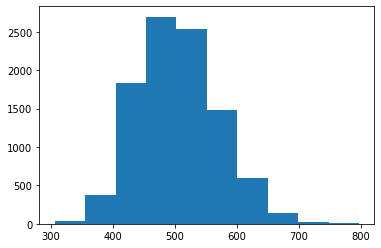

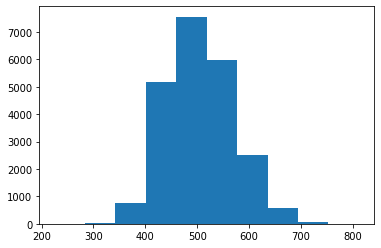

In [55]:
#####################评分映射##########################################         
import math
#### 评分参数 ###
THET=1/1
P_ZERO=500
PDO=50
B=PDO/math.log(2)
A=P_ZERO

####评分映射-训练集 ####
y_train_preprob1 = pd.DataFrame(y_train_preprob,columns=['y_train_preprob'])
y_train_preprob1
y_train_preprob1[y_train_preprob1['y_train_preprob']==1]=0.999
y_train_preprob1[y_train_preprob1['y_train_preprob']==0]=0.001

train_y1=pd.DataFrame(Y_train.values,columns=['Y_train'])
y_train_score=pd.concat([train_y1,y_train_preprob1],axis=1)

y_train_score['Score']=A-B*np.log(y_train_score['y_train_preprob']/(1-y_train_score['y_train_preprob']))
y_train_score

####评分映射-验证集 ####
y_test_preprob1 = pd.DataFrame(y_test_preprob,columns=['y_test_preprob'])
y_test_preprob1
y_test_preprob1[y_test_preprob1['y_test_preprob']==1]=0.999 
y_test_preprob1[y_test_preprob1['y_test_preprob']==0]=0.001

test_y1=pd.DataFrame(Y_test.values,columns=['Y_test'])
y_test_score=pd.concat([test_y1,y_test_preprob1],axis=1)

y_test_score['Score']=A-B*np.log(y_test_score['y_test_preprob']/(1-y_test_score['y_test_preprob']))
# y_test_score

print (A)
print (B)

print(y_test_score['Score'].value_counts())


import matplotlib.pyplot as plt
plt.hist(y_test_score['Score'])
plt.show()

plt.hist(y_train_score['Score'])
plt.show()

In [56]:
#################################################评分排序性2 #########################################
y_train_score.sort_values(by='Score')
y_train_score['rank']=y_train_score['Score'].rank(method='first')
y_train_score.sort_values(by='Score')
y_train_score['bin'] = pd.qcut(y_train_score['rank'],10,precision=1 ,duplicates='drop')
y_train_score_pivot = y_train_score[['bin','Y_train']].groupby('bin').agg(['count','sum'])
y_train_score_pivot.columns = ['tot_cnt','bad_cnt']
y_train_score_pivot[['min','max']] =y_train_score[['bin','Score']].groupby('bin').agg(['min','max']).round(0)

y_train_score_pivot['good_cnt']=y_train_score_pivot['tot_cnt']-y_train_score_pivot['bad_cnt']
y_train_score_pivot['bad_rate']=(y_train_score_pivot['bad_cnt']/y_train_score_pivot['tot_cnt']).round(4)
y_train_score_pivot['good_rate']=(y_train_score_pivot['good_cnt']/y_train_score_pivot['tot_cnt']).round(4)
y_train_score_pivot['lift']=(y_train_score_pivot['bad_cnt']/y_train_score_pivot['bad_cnt'].sum())/(y_train_score_pivot['tot_cnt']/y_train_score_pivot['tot_cnt'].sum())  
y_train_score_pivot=y_train_score_pivot[['min','max','tot_cnt','good_cnt','bad_cnt','good_rate','bad_rate','lift']]   
################################################################################################
y_test_score.sort_values(by='Score')
y_test_score['rank']=y_test_score['Score'].rank(method='first')
y_test_score.sort_values(by='Score')

y_test_score['bin'] = pd.qcut(y_test_score['rank'],10,precision=0 ,duplicates='drop')
y_test_score_pivot = y_test_score[['bin','Y_test']].groupby('bin').agg(['count','sum'])
y_test_score_pivot.columns = ['tot_cnt','bad_cnt']
y_test_score_pivot[['min','max']] =y_test_score[['bin','Score']].groupby('bin').agg(['min','max']).round(0)
y_test_score_pivot['good_cnt']=y_test_score_pivot['tot_cnt']-y_test_score_pivot['bad_cnt']
y_test_score_pivot['bad_rate']=(y_test_score_pivot['bad_cnt']/y_test_score_pivot['tot_cnt']).round(4)
y_test_score_pivot['good_rate']=(y_test_score_pivot['good_cnt']/y_test_score_pivot['tot_cnt']).round(4)

y_test_score_pivot['lift']=(y_test_score_pivot['bad_cnt']/y_test_score_pivot['bad_cnt'].sum())/(y_test_score_pivot['tot_cnt']/y_test_score_pivot['tot_cnt'].sum())  
y_test_score_pivot=y_test_score_pivot[['min','max','tot_cnt','good_cnt','bad_cnt','good_rate','bad_rate','lift']]   

# y_test_score_pivot.to_csv('test_score_bin.csv')
y_test_score_pivot

,min,max,tot_cnt,good_cnt,bad_cnt,good_rate,bad_rate,lift
bin,,,,,,,,
"(0.0, 975.0]",306.0,426.0,974,857,117,0.8799,0.1201,2.488595
"(975.0, 1948.0]",426.0,448.0,974,890,84,0.9138,0.0862,1.786684
"(1948.0, 2922.0]",448.0,465.0,973,898,75,0.9229,0.0771,1.596893
"(2922.0, 3895.0]",465.0,482.0,974,927,47,0.9517,0.0483,0.999692
"(3895.0, 4869.0]",482.0,501.0,974,936,38,0.9610,0.0390,0.808262
"(4869.0, 5843.0]",501.0,519.0,973,944,29,0.9702,0.0298,0.617465
"(5843.0, 6816.0]",519.0,538.0,974,955,19,0.9805,0.0195,0.404131
"(6816.0, 7790.0]",538.0,559.0,973,949,24,0.9753,0.0247,0.511006
"(7790.0, 8763.0]",559.0,592.0,974,950,24,0.9754,0.0246,0.510481


In [57]:
import math
samplea=y_train_score['Score'].values.tolist()
sampleb=y_test_score['Score'].values.tolist()

Max=max(max(samplea),max(sampleb))
Min=min(min(samplea),min(sampleb))
result=pd.DataFrame()

bins=[409,427,445,463,481,499,517,535,553,571,586]

cnt_samplea=pd.cut(samplea,bins).value_counts(dropna=False)
cnt_sampleb=pd.cut(sampleb,bins).value_counts(dropna=False)
print(cnt_samplea)
type(cnt_sampleb)

cnt_all_samplea=len(samplea)
print(cnt_all_samplea)
cnt_all_sampleb=len(sampleb)
result['cnt_train']=cnt_samplea.values
result['cnt_test']=cnt_sampleb.values

result['cnt_all_train']=cnt_all_samplea
result['cnt_all_test']=cnt_all_sampleb
result['cnt_train_rate']=(result['cnt_train']/result['cnt_all_train'])
result['cnt_test_rate']=(result['cnt_test']/result['cnt_all_test'])
result['PSI']=(result['cnt_train_rate']-result['cnt_test_rate'])*np.log(result['cnt_train_rate']/result['cnt_test_rate'])
result['PSI_SUM']=sum(result['PSI'])
# result.to_csv('psi_result.csv',encoding='utf_8_sig' ,sep =',')
result

# np.log(result['PSI'])
# print(np.log(0.006957-0.008339))
# result

(409.0, 427.0]    1171
(427.0, 445.0]    1902
(445.0, 463.0]    2225
(463.0, 481.0]    2374
(481.0, 499.0]    2260
(499.0, 517.0]    2275
(517.0, 535.0]    2256
(535.0, 553.0]    1989
(553.0, 571.0]    1526
(571.0, 586.0]     953
NaN               3787
dtype: int64
22718


,cnt_train,cnt_test,cnt_all_train,cnt_all_test,cnt_train_rate,cnt_test_rate,PSI,PSI_SUM
0,1171,504,22718,9737,0.051545,0.051761,9.057038e-07,0.001773
1,1902,791,22718,9737,0.083722,0.081237,7.491409e-05,0.001773
2,2225,1018,22718,9737,0.097940,0.104550,4.316628e-04,0.001773
3,2374,1058,22718,9737,0.104499,0.108658,1.623221e-04,0.001773
4,2260,891,22718,9737,0.099481,0.091507,6.662340e-04,0.001773
5,2275,955,22718,9737,0.100141,0.098079,4.287538e-05,0.001773
6,2256,935,22718,9737,0.099305,0.096025,1.101025e-04,0.001773
7,1989,887,22718,9737,0.087552,0.091096,1.406377e-04,0.001773
8,1526,680,22718,9737,0.067171,0.069837,1.037124e-04,0.001773
9,953,396,22718,9737,0.041949,0.040670,3.963418e-05,0.001773


# 首次还款日在2020年5.1之前

In [37]:
import pandas as pd
import numpy as np
dt2=pd.read_csv(r'C:\Users\jintong.yan\Desktop\最终小.csv')
dt2.head()

,customerid,inputdate,bd_fst_maturity_dt,bd_age,zmjoinrisk,zmriskrating,zmsolvencyratings,zmcustseg,zmmobilefixedgrade,zmadrstabilitygrade,...,zmhavecarprobgrade,zmhavefangprobgrade,zmovdordercnt6mgrade,zmovdorderamt6mgrade,zmovdorderdays6mgrade,zmpositivebizcnt1ygrade,zmrepayamt6mgrade,zmfirstloanlengthgrade,zmriskscore,y
0,MY20200207116334265590,20200207,20200415,29,1,3,2,4,3,8,...,2,1,1,1,1,10,6,4,5,1
1,MY20200207116860700658,20200207,20200528,34,1,3,1,3,7,4,...,1,2,1,1,1,10,9,3,4,0
2,MY20200207116316008565,20200207,20200322,25,1,2,4,4,5,5,...,1,1,3,1,2,10,9,3,4,1
3,MY20200206116286086431,20200206,20200405,28,1,3,2,4,9,7,...,2,1,2,1,1,5,5,3,6,0
4,MY20200204114707524641,20200204,20200408,29,1,3,2,4,2,6,...,1,1,1,1,2,10,8,3,2,0


In [38]:
dt2.drop(['customerid','inputdate','bd_fst_maturity_dt'],inplace=True,axis=1)
data_1_y=dt2[dt2['y']>29]
data_0_y = dt2[dt2['y']==0]
data = pd.concat([data_1_y,data_0_y],axis=0)
data['y'] = data['y'].apply(lambda x: 1 if x>29 else 0 )
# data.to_csv('F:\y_net.csv',encoding='GBK')
data_y1 =data['y']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23787 entries, 32 to 28582
Data columns (total 21 columns):
bd_age                        23787 non-null int64
zmjoinrisk                    23787 non-null int64
zmriskrating                  23787 non-null int64
zmsolvencyratings             23787 non-null int64
zmcustseg                     23787 non-null int64
zmmobilefixedgrade            23787 non-null int64
zmadrstabilitygrade           23787 non-null int64
zmdevstabilitygrade           23787 non-null int64
zmtotpayamt6mgrade            23787 non-null int64
zmxfdcindex                   23787 non-null int64
zmlast6mavgassettotalgrade    23787 non-null int64
zmhavecarprobgrade            23787 non-null int64
zmhavefangprobgrade           23787 non-null int64
zmovdordercnt6mgrade          23787 non-null int64
zmovdorderamt6mgrade          23787 non-null int64
zmovdorderdays6mgrade         23787 non-null int64
zmpositivebizcnt1ygrade       23787 non-null int64
zmrepayamt6mgrade      

In [39]:
data['y'].value_counts()

0    22695
1     1092
Name: y, dtype: int64

In [40]:
print(data.isnull().sum())

bd_age                        0
zmjoinrisk                    0
zmriskrating                  0
zmsolvencyratings             0
zmcustseg                     0
zmmobilefixedgrade            0
zmadrstabilitygrade           0
zmdevstabilitygrade           0
zmtotpayamt6mgrade            0
zmxfdcindex                   0
zmlast6mavgassettotalgrade    0
zmhavecarprobgrade            0
zmhavefangprobgrade           0
zmovdordercnt6mgrade          0
zmovdorderamt6mgrade          0
zmovdorderdays6mgrade         0
zmpositivebizcnt1ygrade       0
zmrepayamt6mgrade             0
zmfirstloanlengthgrade        0
zmriskscore                   0
y                             0
dtype: int64


## 建模

In [41]:
oot_y=data['y']
list=['zmriskrating'
,'zmovdorderdays6mgrade'
#,'zmcustseg'
,'zmfirstloanlengthgrade'
,'zmovdordercnt6mgrade'
#,'zmovdorderamt6mgrade'
,'zmriskscore'
#,'zmrepayamt6mgrade'
,'zmlast6mavgassettotalgrade'
,'zmtotpayamt6mgrade'
#,'zmhavecarprobgrade'
#,'zmxfdcindex'
,'zmpositivebizcnt1ygrade'
,'zmadrstabilitygrade'
#,'bd_age'
#,'zmmobilefixedgrade'
#,'zmsolvencyratings'
    ]
oot_X=data[list]
oot_X.fillna(-9999,inplace=True)

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [42]:
y_oot_preprob=xgbc.predict_proba(oot_X)[:,1]  # type(rf.predict_proba(train_X)) 为ndarray
# y_grey_preprob=rf.predict_proba(df_wide_grey[var_list])[:,1]
print('AUC (train): %f'% metrics.roc_auc_score(oot_y,y_oot_preprob))

oot_fpr, oot_tpr, oot_threshold = roc_curve(oot_y, y_oot_preprob)
print('KS(oot):',max(oot_tpr-oot_fpr).round(3))

AUC (train): 0.746840
KS(oot): 0.374


In [43]:
####评分映射-oot ####
y_oot_preprob1 = pd.DataFrame(y_oot_preprob,columns=['y_oot_preprob'])
y_oot_preprob1
y_oot_preprob1[y_oot_preprob1['y_oot_preprob']==1]=0.999
y_oot_preprob1[y_oot_preprob1['y_oot_preprob']==0]=0.001

oot_y1=pd.DataFrame(oot_y.values,columns=['oot_y'])
y_oot_score=pd.concat([oot_y1,y_oot_preprob1],axis=1)

y_oot_score['Score']=A-B*np.log(y_oot_score['y_oot_preprob']/(1-y_oot_score['y_oot_preprob']))
y_oot_score

### 评分排序性- oot #########

y_oot_score['rank']=y_oot_score['Score'].rank(method='first')
y_oot_score.sort_values(by='Score')
y_oot_score['bin'] = pd.qcut(y_oot_score['rank'],10,precision=1 ,duplicates='drop')

# y_oot_score['bin'] = pd.qcut(y_oot_score['Score'],10,precision=0 ,duplicates='drop')
y_oot_score_pivot = y_oot_score[['bin','oot_y']].groupby('bin').agg(['count','sum'])
y_oot_score_pivot.columns = ['tot_cnt','bad_cnt']

y_oot_score_pivot['good_cnt']=y_oot_score_pivot['tot_cnt']-y_oot_score_pivot['bad_cnt']
y_oot_score_pivot['bad_rate']=(y_oot_score_pivot['bad_cnt']/y_oot_score_pivot['tot_cnt']).round(4)
y_oot_score_pivot['good_rate']=(y_oot_score_pivot['good_cnt']/y_oot_score_pivot['tot_cnt']).round(4)
y_oot_score_pivot[['min','max']] =y_oot_score[['bin','Score']].groupby('bin').agg(['min','max']).round(0)
# y_oot_score_pivot.loc['row_sum']=y_oot_score_pivot.apply(lambda x: x.sum())
y_oot_score_pivot['lift']=(y_oot_score_pivot['bad_cnt']/y_oot_score_pivot['bad_cnt'].sum())/(y_oot_score_pivot['tot_cnt']/y_oot_score_pivot['tot_cnt'].sum())  
y_oot_score_pivot =y_oot_score_pivot[['min','max','tot_cnt','good_cnt','bad_cnt','good_rate','bad_rate','lift']]         
y_oot_score_pivot

,min,max,tot_cnt,good_cnt,bad_cnt,good_rate,bad_rate,lift
bin,,,,,,,,
"(0.9, 2379.6]",367.0,448.0,2379,2016,363,0.8474,0.1526,3.323757
"(2379.6, 4758.2]",448.0,461.0,2379,2177,202,0.9151,0.0849,1.849584
"(4758.2, 7136.8]",461.0,478.0,2378,2232,146,0.9386,0.0614,1.337390
"(7136.8, 9515.4]",478.0,495.0,2379,2269,110,0.9538,0.0462,1.007199
"(9515.4, 11894.0]",495.0,506.0,2379,2296,83,0.9651,0.0349,0.759977
"(11894.0, 14272.6]",506.0,517.0,2378,2324,54,0.9773,0.0227,0.494651
"(14272.6, 16651.2]",517.0,527.0,2379,2332,47,0.9802,0.0198,0.430349
"(16651.2, 19029.8]",527.0,543.0,2378,2339,39,0.9836,0.0164,0.357248
"(19029.8, 21408.4]",543.0,564.0,2379,2346,33,0.9861,0.0139,0.302160


In [267]:
varlist=['zmriskrating'
,'zmovdorderdays6mgrade'
#,'zmcustseg'
,'zmfirstloanlengthgrade'
,'zmovdordercnt6mgrade'
#,'zmovdorderamt6mgrade'
,'zmriskscore'
#,'zmrepayamt6mgrade'
,'zmlast6mavgassettotalgrade'
,'zmtotpayamt6mgrade'
#,'zmhavecarprobgrade'
#,'zmxfdcindex'
,'zmpositivebizcnt1ygrade'
,'zmadrstabilitygrade'
#,'bd_age'
#,'zmmobilefixedgrade'
#,'zmsolvencyratings'
         ,'y']
data_clean1=data[varlist]

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score  
from sklearn.ensemble import RandomForestClassifier
np.random.seed(2)
X_train, X_test, Y_train, Y_test= train_test_split(data_clean1.iloc[:,:-1],data_clean1['y'],test_size=0.3,random_state=2)##random_state：设置随机数种子，保证每次都是同一个随机数。若为0或不填，则每次得到数据都不一样
data_train= pd.concat([X_train,Y_train,], axis=1)#训练数据构建模型
data_train.index = range(data_train.shape[0])
data_train.columns = data_clean1.columns
 
data_test = pd.concat([X_test,Y_test], axis=1)#验证集
data_test.index = range(data_test.shape[0])
data_test.columns = data_clean1.columns
data_test.columns

Index(['zmriskrating', 'zmovdorderdays6mgrade', 'zmfirstloanlengthgrade',
       'zmovdordercnt6mgrade', 'zmriskscore', 'zmlast6mavgassettotalgrade',
       'zmtotpayamt6mgrade', 'zmpositivebizcnt1ygrade', 'zmadrstabilitygrade',
       'y'],
      dtype='object')

In [271]:
import xgboost as xgb
xgbc=xgb.XGBClassifier(
    colsample_bylevel=0.8,
    max_depth=3,###2\3\4
    scale_pos_weight=27,#24
    n_estimators=36,###24
    colsample_bytree=0.8,
    ##earning_rate=0.1,
    subsample=0.6,
    objective='binary:logistic'
    ,seed=20)
clf1=xgbc.fit(X_train,Y_train)

In [272]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
y_train_preprob=xgbc.predict_proba(X_train)[:,1]  # type(rf.predict_proba(train_X)) 为ndarray
y_test_preprob=xgbc.predict_proba(X_test)[:,1]
print('AUC (train): %f'% metrics.roc_auc_score(Y_train,y_train_preprob))
print('AUC (test): %f'% metrics.roc_auc_score(Y_test,y_test_preprob))

train_fpr, train_tpr, train_threshold = roc_curve(Y_train, y_train_preprob)
test_fpr, test_tpr, test_threshold = roc_curve(Y_test, y_test_preprob)

print('KS(train):',max(train_tpr-train_fpr).round(3))
print('KS(test):',max(test_tpr-test_fpr).round(3))

AUC (train): 0.776225
AUC (test): 0.701958
KS(train): 0.425
KS(test): 0.324


## 转化为分

500
72.13475204444818
548.148865    40
546.437866    33
451.506012    32
441.011108    29
548.396423    27
              ..
524.937805     1
532.936340     1
516.934998     1
486.465027     1
600.000000     1
Name: Score, Length: 3813, dtype: int64


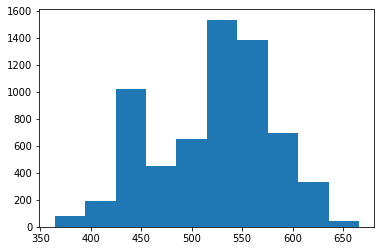

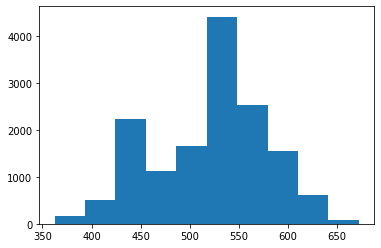

In [273]:
#####################评分映射##########################################         
import math
#### 评分参数 ###
THET=1/1
P_ZERO=500
PDO=50
B=PDO/math.log(2)
A=P_ZERO

####评分映射-训练集 ####
y_train_preprob1 = pd.DataFrame(y_train_preprob,columns=['y_train_preprob'])
y_train_preprob1
y_train_preprob1[y_train_preprob1['y_train_preprob']==1]=0.999
y_train_preprob1[y_train_preprob1['y_train_preprob']==0]=0.001

train_y1=pd.DataFrame(Y_train.values,columns=['Y_train'])
y_train_score=pd.concat([train_y1,y_train_preprob1],axis=1)

y_train_score['Score']=A-B*np.log(y_train_score['y_train_preprob']/(1-y_train_score['y_train_preprob']))
y_train_score

####评分映射-验证集 ####
y_test_preprob1 = pd.DataFrame(y_test_preprob,columns=['y_test_preprob'])
y_test_preprob1
y_test_preprob1[y_test_preprob1['y_test_preprob']==1]=0.999 
y_test_preprob1[y_test_preprob1['y_test_preprob']==0]=0.001

test_y1=pd.DataFrame(Y_test.values,columns=['Y_test'])
y_test_score=pd.concat([test_y1,y_test_preprob1],axis=1)

y_test_score['Score']=A-B*np.log(y_test_score['y_test_preprob']/(1-y_test_score['y_test_preprob']))
# y_test_score

print (A)
print (B)

print(y_test_score['Score'].value_counts())


import matplotlib.pyplot as plt
plt.hist(y_test_score['Score'])
plt.show()

plt.hist(y_train_score['Score'])
plt.show()

In [274]:
#################################################评分排序性2 #########################################
y_train_score.sort_values(by='Score')
y_train_score['rank']=y_train_score['Score'].rank(method='first')
y_train_score.sort_values(by='Score')
y_train_score['bin'] = pd.qcut(y_train_score['rank'],10,precision=1 ,duplicates='drop')
y_train_score_pivot = y_train_score[['bin','Y_train']].groupby('bin').agg(['count','sum'])
y_train_score_pivot.columns = ['tot_cnt','bad_cnt']
y_train_score_pivot[['min','max']] =y_train_score[['bin','Score']].groupby('bin').agg(['min','max']).round(0)

y_train_score_pivot['good_cnt']=y_train_score_pivot['tot_cnt']-y_train_score_pivot['bad_cnt']
y_train_score_pivot['bad_rate']=(y_train_score_pivot['bad_cnt']/y_train_score_pivot['tot_cnt']).round(4)
y_train_score_pivot['good_rate']=(y_train_score_pivot['good_cnt']/y_train_score_pivot['tot_cnt']).round(4)
y_train_score_pivot['lift']=(y_train_score_pivot['bad_cnt']/y_train_score_pivot['bad_cnt'].sum())/(y_train_score_pivot['tot_cnt']/y_train_score_pivot['tot_cnt'].sum())  
y_train_score_pivot=y_train_score_pivot[['min','max','tot_cnt','good_cnt','bad_cnt','good_rate','bad_rate','lift']]   
################################################################################################
y_test_score.sort_values(by='Score')
y_test_score['rank']=y_test_score['Score'].rank(method='first')
y_test_score.sort_values(by='Score')

y_test_score['bin'] = pd.qcut(y_test_score['rank'],10,precision=0 ,duplicates='drop')
y_test_score_pivot = y_test_score[['bin','Y_test']].groupby('bin').agg(['count','sum'])
y_test_score_pivot.columns = ['tot_cnt','bad_cnt']
y_test_score_pivot[['min','max']] =y_test_score[['bin','Score']].groupby('bin').agg(['min','max']).round(0)
y_test_score_pivot['good_cnt']=y_test_score_pivot['tot_cnt']-y_test_score_pivot['bad_cnt']
y_test_score_pivot['bad_rate']=(y_test_score_pivot['bad_cnt']/y_test_score_pivot['tot_cnt']).round(4)
y_test_score_pivot['good_rate']=(y_test_score_pivot['good_cnt']/y_test_score_pivot['tot_cnt']).round(4)

y_test_score_pivot['lift']=(y_test_score_pivot['bad_cnt']/y_test_score_pivot['bad_cnt'].sum())/(y_test_score_pivot['tot_cnt']/y_test_score_pivot['tot_cnt'].sum())  
y_test_score_pivot=y_test_score_pivot[['min','max','tot_cnt','good_cnt','bad_cnt','good_rate','bad_rate','lift']]   

# y_test_score_pivot.to_csv('test_score_bin.csv')
y_test_score_pivot

,min,max,tot_cnt,good_cnt,bad_cnt,good_rate,bad_rate,lift
bin,,,,,,,,
"(0.0, 639.0]",364.0,436.0,639,562,77,0.8795,0.1205,2.869537
"(639.0, 1277.0]",436.0,454.0,638,589,49,0.9232,0.0768,1.828931
"(1277.0, 1915.0]",454.0,497.0,638,605,33,0.9483,0.0517,1.231729
"(1915.0, 2553.0]",497.0,521.0,638,616,22,0.9655,0.0345,0.821153
"(2553.0, 3192.0]",521.0,534.0,638,617,21,0.9671,0.0329,0.783828
"(3192.0, 3830.0]",534.0,544.0,638,616,22,0.9655,0.0345,0.821153
"(3830.0, 4468.0]",544.0,550.0,638,626,12,0.9812,0.0188,0.447902
"(4468.0, 5106.0]",550.0,567.0,638,626,12,0.9812,0.0188,0.447902
"(5106.0, 5744.0]",567.0,593.0,638,629,9,0.9859,0.0141,0.335926


# 储存模型

## .m文件

In [66]:
from sklearn.externals import joblib
joblib.dump(value=clf, filename='clf_apoloi_model_A.m')

['jiebei2.0.m']

In [1]:
from sklearn.externals import joblib
model= joblib.load(filename='clf_apoloi_model_A.m')
model

D:\Program Files\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


XGBoostError: [11:30:48] D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:922: Check failed: header == serialisation_header_: 

  If you are loading a serialized model (like pickle in Python) generated by older
  XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version.  There's a simple script for helping
  the process. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for reference to the script, and more details about differences between saving model and
  serializing.



## 用pickle保存文件

In [46]:
import pickle

In [47]:
pkl_filename='jiebei_jiebei2.0abl_v1_20210219.pkl'
with open('jiebei_jiebei2.0abl_v1_20210219.pkl','wb')as f:
    pickle.dump(clf1,f)
f.close()

In [50]:
with open('jiebei_jiebei2.0abl_v1_20210219.pkl','rb')as f:
    model=pickle.load(f)
model
#f.close()

## pmml导出

In [70]:
# pipeline.fit(X_train,Y_train)
import sklearn2pmml
from sklearn2pmml import sklearn2pmml
#sklearn2pmml(pipeline, "jiebei2.pmml")
sklearn2pmml(pipeline, 'jiebei2.pmml')

NameError: name 'pipeline' is not defined

In [72]:
from pypmml import Model
model=Model.fromFile("jiebei2.pmml")

# Score

In [83]:
import pandas as pd
oot=pd.read_csv(r'C:\Users\jintong.yan\借呗2.0建模\ootyz.csv')

In [84]:
oot.head()

,customerid,zmjoinrisk,zmRiskRating,zmsolvencyratings,zmcustseg,zmmobilefixedgrade,zmAdrStabilityGrade,zmdevstabilitygrade,zmTotPayAmt6mGrade,zmxfdcindex,...,zmhavecarprobgrade,zmhavefangprobgrade,zmOvdOrderCnt6mGrade,zmovdorderamt6mgrade,zmOvdOrderDays6mGrade,zmPositiveBizCnt1yGrade,zmrepayamt6mgrade,zmFirstLoanLengthGrade,zmRiskScore,y
0,HCFCN20201230408446305731,1,2,3,4,10,7,4,2,2,...,1,1,5,1,1,10,6,3,5,0
1,HCFCN20201229408904041983,1,3,4,3,5,10,2,6,3,...,2,1,1,1,1,10,6,4,4,0
2,HCFCN20201229408694698408,1,3,4,2,5,9,2,6,2,...,2,1,1,1,1,10,6,4,4,0
3,HCFCN20201229408681595027,1,3,4,4,10,8,4,4,2,...,1,1,2,1,1,10,6,4,4,0
4,HCFCN20201229408319285861,1,3,4,3,8,2,2,5,2,...,1,1,1,1,1,10,8,2,6,0


In [85]:
from fx.feature import transform_y
yz=transform_y(oot,##引入数据
                 'y',##标签
                 threshold=9##大于多少定义为1
                 )

In [86]:
yz['y'].value_counts()

0    22683
1      174
Name: y, dtype: int64

In [87]:
var_list=['zmRiskRating',
                     'zmOvdOrderDays6mGrade',
                     'zmFirstLoanLengthGrade',
                     'zmOvdOrderCnt6mGrade',
                     'zmRiskScore',
                     'zmLast6mAvgAssetTotalGrade',
                     'zmTotPayAmt6mGrade',
                     'zmPositiveBizCnt1yGrade',
                     'zmAdrStabilityGrade']
yz.fillna(-9999,inplace=True)

In [91]:
yz.head()

,customerid,zmjoinrisk,zmRiskRating,zmsolvencyratings,zmcustseg,zmmobilefixedgrade,zmAdrStabilityGrade,zmdevstabilitygrade,zmTotPayAmt6mGrade,zmxfdcindex,...,zmhavecarprobgrade,zmhavefangprobgrade,zmOvdOrderCnt6mGrade,zmovdorderamt6mgrade,zmOvdOrderDays6mGrade,zmPositiveBizCnt1yGrade,zmrepayamt6mgrade,zmFirstLoanLengthGrade,zmRiskScore,y
159,MY2019092262785001038,1,3,4,3,7,4,3,6,2,...,2,1,5,1,1,2,5,3,7,1
361,HCFCN20201230409333927573,1,3,1,3,10,8,3,9,4,...,1,1,1,1,1,10,6,4,5,1
674,HCFCN20201229408171958867,1,3,1,4,10,2,2,8,2,...,1,1,5,1,1,10,6,4,5,1
825,HCFCN20201229408115557787,1,3,3,3,9,2,1,7,2,...,1,1,3,1,3,10,7,3,5,1
1057,HCFCN20201230409115842433,1,3,4,3,9,4,3,6,3,...,2,1,5,1,2,10,6,3,5,1


In [103]:
shuju=yz[var_list]

In [107]:
import numpy as np
import math
#### 评分参数 ###
THET=1/1
P_ZERO=500
PDO=50
B=PDO/math.log(2)
A=P_ZERO

#xgbc_load = joblib.load('train_model.m')    # 加载模型
shuju['prob']=model.predict(shuju)[:,1] ##输出概率
# yz['Score']=A-B*np.log(yz['prob']/(1-yz['prob']))##概率转换成分数

TypeError: '(slice(None, None, None), 1)' is an invalid key

In [95]:
from public.Score import make_scorecard
yz_sc = make_scorecard(model.predict(yz[var_list]),basescore=500,pdo=50)

TypeError: '<' not supported between instances of 'str' and 'float'

In [65]:
from public.Score import make_psi,make_lift
lift = make_lift(yz['y'],yz_sc[0]) 
lift

,分位数,最低分,最高分,全体数,Y=1观测数,Y=1占比,Y=1累计占比,提升率,累计提升率
0,10,395,483,1912,42,0.021967,0.021967,1.809871,1.809871
1,20,483,496,1911,43,0.022501,0.022234,1.853933,1.831897
2,30,496,511,1912,25,0.013075,0.019180,1.077304,1.580322
3,40,511,522,1911,24,0.012559,0.017526,1.034753,1.443966
4,50,522,529,1912,22,0.011506,0.016321,0.948028,1.344757
5,60,529,537,1911,19,0.009942,0.015259,0.819180,1.257184
6,70,537,542,1911,12,0.006279,0.013976,0.517377,1.151521
7,80,542,550,1912,24,0.012552,0.013798,1.034212,1.136853
8,90,550,560,1911,12,0.006279,0.012963,0.517377,1.068039
9,100,560,590,1912,9,0.004707,0.012137,0.387830,1.000000


In [92]:
yz.to_csv('6-7月分数.csv')

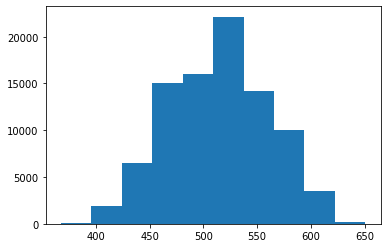

In [74]:
import matplotlib.pyplot as plt
plt.hist(yz['Score'])
plt.show()

# Score varification

In [254]:
y_test_score.to_csv('test_score.csv')

In [37]:
import pandas as pd
yz=pd.read_csv(r'test.csv')

In [39]:
yz.head()

,Unnamed: 0,zmRiskRating,zmOvdOrderDays6mGrade,zmFirstLoanLengthGrade,zmOvdOrderCnt6mGrade,zmRiskScore,zmLast6mAvgAssetTotalGrade,zmTotPayAmt6mGrade,zmPositiveBizCnt1yGrade,zmAdrStabilityGrade,y
0,0,2,1,4,1,3,1,4,10,9,0
1,1,1,2,4,4,3,3,5,10,10,0
2,2,3,1,2,1,6,1,6,4,2,0
3,3,2,1,4,1,2,2,7,8,10,0
4,4,3,1,2,1,5,1,7,10,1,0


In [43]:
var_list=['zmRiskRating',
                     'zmOvdOrderDays6mGrade',
                     'zmFirstLoanLengthGrade',
                     'zmOvdOrderCnt6mGrade',
                     'zmRiskScore',
                     'zmLast6mAvgAssetTotalGrade',
                     'zmTotPayAmt6mGrade',
                     'zmPositiveBizCnt1yGrade',
                     'zmAdrStabilityGrade']
yz.fillna(-9999,inplace=True)

In [89]:
import numpy as np
import math
#### 评分参数 ###
THET=1/1
P_ZERO=500
PDO=50
B=PDO/math.log(2)
A=P_ZERO

#xgbc_load = joblib.load('train_model.m')    # 加载模型
yz['prob']=model.predict_proba(yz[var_list])[:,1] ##输出概率
yz['Score']=A-B*np.log(yz['prob']/(1-yz['prob']))##概率转换成分数

AttributeError: 'Model' object has no attribute 'predict_proba'

In [45]:
yz.to_csv('test_yz.csv')